<a href="https://colab.research.google.com/github/gohibi/pythonbases/blob/main/lab7_MULTIPLE_LINEAR__ORRELATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [ ]:
data ={ 'Y':[81.5,82.3,83.8,83.1,84.3 ,82.6,85.4,84.6,86.8,88.3],
        'X1':[37.9,36.5,36.6,38.2,39.4,39.8,40.1,41.5,42.6,45.7],
        'X2':[11.6,11.5,11.5,11.8,12,12.2,12.5,12.6,12.8,13.2],
        'X3':[9.5,10.6,7.8,9.1,13.6,14.1,14.6,15.1,16,17.2]}

In [ ]:
def graph(c,d,k):
  plt.subplot(3,1,k)
  linear_regressor = LinearRegression()
  c=np.reshape(c,(10,1))
  d=np.reshape(d,(10,1))
  linear_regressor.fit(c,d)
  pred = linear_regressor.predict(c)
  plt.scatter(c,d)
  plt.plot(c,pred,color='red')

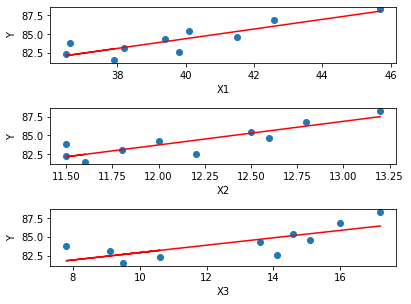

In [ ]:
graph(data['X1'],data['Y'],1);plt.xlabel('X1');plt.ylabel('Y')
graph(data['X2'],data['Y'],2);plt.xlabel('X2');plt.ylabel('Y')
graph(data['X3'],data['Y'],3);plt.xlabel('X3');plt.ylabel('Y')
plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9,top=1, wspace=0.4,hspace=0.8) 
plt.show()

In [ ]:
df1=pd.DataFrame(data)

In [ ]:
df1

,Y,X1,X2,X3
0,81.5,37.9,11.6,9.5
1,82.3,36.5,11.5,10.6
2,83.8,36.6,11.5,7.8
3,83.1,38.2,11.8,9.1
4,84.3,39.4,12.0,13.6
5,82.6,39.8,12.2,14.1
6,85.4,40.1,12.5,14.6
7,84.6,41.5,12.6,15.1
8,86.8,42.6,12.8,16.0
9,88.3,45.7,13.2,17.2


In [ ]:
data1 ={'Y^2':[df1.loc[i,'Y']**2 for i in range (len(df1))],
        'X1^2':[df1.loc[i,'X1']**2 for i in range (len(df1))],
        'X2^2':[df1.loc[i,'X2']**2 for i in range (len(df1))],
        'X3^2':[df1.loc[i,'X3']**2 for i in range (len(df1))],
        'YX1':[df1.loc[i,'Y']*df1.loc[i,'X1'] for i in range (len(df1))],
        'YX2':[df1.loc[i,'Y']*df1.loc[i,'X2'] for i in range (len(df1))],
        'YX3':[df1.loc[i,'Y']*df1.loc[i,'X3'] for i in range (len(df1))],
        'X1X2':[df1.loc[i,'X1']*df1.loc[i,'X2'] for i in range (len(df1))],
        'X1X3':[df1.loc[i,'X1']*df1.loc[i,'X3'] for i in range (len(df1))],
        'X2X3':[df1.loc[i,'X2']*df1.loc[i,'X3'] for i in range (len(df1))]}

In [ ]:
df2=pd.DataFrame(data1)
df2

,Y^2,X1^2,X2^2,X3^2,YX1,YX2,YX3,X1X2,X1X3,X2X3
0,6642.25,1436.41,134.56,90.25,3088.85,945.40,774.25,439.64,360.05,110.20
1,6773.29,1332.25,132.25,112.36,3003.95,946.45,872.38,419.75,386.90,121.90
2,7022.44,1339.56,132.25,60.84,3067.08,963.70,653.64,420.90,285.48,89.70
3,6905.61,1459.24,139.24,82.81,3174.42,980.58,756.21,450.76,347.62,107.38
4,7106.49,1552.36,144.00,184.96,3321.42,1011.60,1146.48,472.80,535.84,163.20
5,6822.76,1584.04,148.84,198.81,3287.48,1007.72,1164.66,485.56,561.18,172.02
6,7293.16,1608.01,156.25,213.16,3424.54,1067.50,1246.84,501.25,585.46,182.50
7,7157.16,1722.25,158.76,228.01,3510.90,1065.96,1277.46,522.90,626.65,190.26
8,7534.24,1814.76,163.84,256.00,3697.68,1111.04,1388.80,545.28,681.60,204.80
9,7796.89,2088.49,174.24,295.84,4035.31,1165.56,1518.76,603.24,786.04,227.04


In [ ]:
result = pd.concat([df1,df2], axis=1)
result

,Y,X1,X2,X3,Y^2,X1^2,X2^2,X3^2,YX1,YX2,YX3,X1X2,X1X3,X2X3
0,81.5,37.9,11.6,9.5,6642.25,1436.41,134.56,90.25,3088.85,945.40,774.25,439.64,360.05,110.20
1,82.3,36.5,11.5,10.6,6773.29,1332.25,132.25,112.36,3003.95,946.45,872.38,419.75,386.90,121.90
2,83.8,36.6,11.5,7.8,7022.44,1339.56,132.25,60.84,3067.08,963.70,653.64,420.90,285.48,89.70
3,83.1,38.2,11.8,9.1,6905.61,1459.24,139.24,82.81,3174.42,980.58,756.21,450.76,347.62,107.38
4,84.3,39.4,12.0,13.6,7106.49,1552.36,144.00,184.96,3321.42,1011.60,1146.48,472.80,535.84,163.20
5,82.6,39.8,12.2,14.1,6822.76,1584.04,148.84,198.81,3287.48,1007.72,1164.66,485.56,561.18,172.02
6,85.4,40.1,12.5,14.6,7293.16,1608.01,156.25,213.16,3424.54,1067.50,1246.84,501.25,585.46,182.50
7,84.6,41.5,12.6,15.1,7157.16,1722.25,158.76,228.01,3510.90,1065.96,1277.46,522.90,626.65,190.26
8,86.8,42.6,12.8,16.0,7534.24,1814.76,163.84,256.00,3697.68,1111.04,1388.80,545.28,681.60,204.80
9,88.3,45.7,13.2,17.2,7796.89,2088.49,174.24,295.84,4035.31,1165.56,1518.76,603.24,786.04,227.04


In [ ]:
n=len(result)
n

10

In [ ]:
y_Sr = result['Y'].mean()
y_2_Sr=result['Y^2'].mean()
Sy_2 = y_2_Sr - (y_Sr)**2
Sy = np.sqrt(Sy_2)
print("y_Sr  = %0.3f \n"% y_Sr)
print(" y_2_Sr = %0.3f  \n"% y_2_Sr)
print(" Sy_2 = %0.3f  \n"% Sy_2)
print(" Sy = %0.3f  \n"% Sy)

y_Sr  = 84.270 

 y_2_Sr = 7105.429  

 Sy_2 = 3.996  

 Sy = 1.999  



In [ ]:
x1_Sr = result['X1'].mean()
x1_2_Sr=result['X1^2'].mean()
Sx1_2 = x1_2_Sr - (x1_Sr)**2
Sx1 = np.sqrt(Sx1_2)
print("x1_Sr  = %0.3f \n"% x1_Sr)
print(" x1_2_Sr = %0.3f  \n"% x1_2_Sr)
print(" Sx1_2 = %0.3f  \n"% Sx1_2)
print(" Sx1 = %0.3f  \n"% Sx1)

x1_Sr  = 39.830 

 x1_2_Sr = 1593.737  

 Sx1_2 = 7.308  

 Sx1 = 2.703  



In [ ]:
x2_Sr = result['X2'].mean()
x2_2_Sr=result['X2^2'].mean()
Sx2_2 = x2_2_Sr - (x2_Sr)**2
Sx2 = np.sqrt(Sx2_2)
print("x2_Sr  = %0.3f \n"% x2_Sr)
print(" x2_2_Sr = %0.3f  \n"% x2_2_Sr)
print(" Sx2_2 = %0.3f  \n"% Sx2_2)
print(" Sx2 = %0.3f  \n"% Sx2)

x2_Sr  = 12.170 

 x2_2_Sr = 148.423  

 Sx2_2 = 0.314  

 Sx2 = 0.560  



In [ ]:
x3_Sr = result['X3'].mean()
x3_2_Sr=result['X3^2'].mean()
Sx3_2 = x3_2_Sr - (x3_Sr)**2
Sx3 = np.sqrt(Sx3_2)
print("x3_Sr  = %0.3f \n"% x3_Sr)
print(" x3_2_Sr = %0.3f  \n"% x3_2_Sr)
print(" Sx3_2 = %0.3f  \n"% Sx3_2)
print(" Sx3 = %0.3f  \n"% Sx3)

x3_Sr  = 12.760 

 x3_2_Sr = 172.304  

 Sx3_2 = 9.486  

 Sx3 = 3.080  



In [ ]:
yx1_sr=result['YX1'].mean()
yx2_sr=result['YX2'].mean()
yx3_sr=result['YX3'].mean()
print("yx1_sr =%0.3f \n"% yx1_sr)
print("yx2_sr =%0.3f \n"% yx2_sr)
print("yx3_sr =%0.3f \n"% yx3_sr)

yx1_sr =3361.163 

yx2_sr =1026.551 

yx3_sr =1079.948 



In [ ]:
x1x2_sr=result['X1X2'].mean()
x1x3_sr=result['X1X3'].mean()
x2x3_sr=result['X2X3'].mean()
print("x1x2_sr =%0.3f \n"% x1x2_sr)
print("x1x3_sr =%0.3f \n"% x1x3_sr)
print("x2x3_sr =%0.3f \n"% x2x3_sr)

x1x2_sr =486.208 

x1x3_sr =515.682 

x2x3_sr =156.900 



In [ ]:
ryx1 =(yx1_sr - (y_Sr*x1_Sr))/(Sy*Sx1)
ryx2 = (yx2_sr - (y_Sr*x2_Sr))/(Sy*Sx2)
ryx3 = (yx3_sr - (y_Sr*x3_Sr))/(Sy*Sx3)
print("ryx1 = %0.3f \n"%ryx1)
print("ryx2 = %0.3f \n"%ryx2)
print("ryx3 = %0.3f \n"%ryx3)

ryx1 = 0.868 

ryx2 = 0.879 

ryx3 = 0.757 



In [ ]:
rx1x2 =(x1x2_sr - (x1_Sr*x2_Sr))/(Sx1*Sx2)
rx1x3 =(x1x3_sr - (x1_Sr*x3_Sr))/(Sx1*Sx3)
rx2x3 =(x2x3_sr - (x2_Sr*x3_Sr))/(Sx2*Sx3)
print("rx1x2 = %0.3f \n"%rx1x2)
print("rx1x3 = %0.3f \n"%rx1x3)
print("rx2x3 = %0.3f \n"%rx2x3)

rx1x2 = 0.975 

rx1x3 = 0.895 

rx2x3 = 0.933 



In [ ]:
ryx1_2=(ryx1)**2
ryx2_2=(ryx2)**2
ryx3_2=(ryx3)**2
rx1x2_2=(rx1x2)**2
rx1x3_2=(rx1x3)**2
rx2x3_2=(rx2x3)**2
print("ryx1_2 = %0.3f \n"% ryx1_2)
print("ryx2_2 = %0.3f \n"% ryx2_2)
print("ryx3_2 = %0.3f \n"% ryx3_2)
print("rx1x2_2 = %0.3f \n"% rx1x2_2)
print("rx1x3_2 = %0.3f \n"% rx1x3_2)
print("rx2x3_2 = %0.3f \n"% rx2x3_2)


ryx1_2 = 0.753 

ryx2_2 = 0.773 

ryx3_2 = 0.574 

rx1x2_2 = 0.950 

rx1x3_2 = 0.801 

rx2x3_2 = 0.871 



In [ ]:
rx1x2 = 0.975 
print('Значения парного коэффициента корреляции свидетельствует о весьма сильной линейной связи между x1 и x2 \n')
rx1x3 = 0.895 
print('Значения парного коэффициента корреляции свидетельствует о весьма сильной линейной связи между x1 и x3 \n')
rx2x3 = 0.933
print('Значения парного коэффициента корреляции свидетельствует о весьма сильной линейной связи между x2 и x3 \n')

Значения парного коэффициента корреляции свидетельствует о весьма сильной линейной связи между x1 и x2 

Значения парного коэффициента корреляции свидетельствует о весьма сильной линейной связи между x1 и x3 

Значения парного коэффициента корреляции свидетельствует о весьма сильной линейной связи между x2 и x3 



In [ ]:
rx1x2 = 0.975
if ryx1 < ryx2 :
  print('признак Х1 исключается')
else:
  print('признак Х2 исключается')

признак Х1 исключается


In [ ]:
print('Линейная модель, описывающая корреляционную зависимость, имеет следующий общий вид: ')
print('y = a1*x2 + a2*x3 + b')

уравнение множественной регрессии

In [ ]:
ryx2_2 = 0.773
ryx3_2 = 0.574 
ryx2 = 0.879 
ryx3 = 0.757 
rx2x3 = 0.933 
rx2x3_2 = 0.871
k=n-3
alpha = 0.05
R_y_x2x3 =np.sqrt((ryx2_2 + ryx3_2 - 2*ryx2*ryx3*rx2x3)/(1-rx2x3_2))
print("R_y_x2x3 = %0.3f \n"%R_y_x2x3)
R_= np.sqrt((1-(1-(R_y_x2x3)**2)*(n-1)/(n-k-1)))
print("R_ = %0.3f \n"%R_)
Sr=1/np.sqrt(n-1)
print("Sr = %0.3f \n"% Sr)
Tвыбр = R_/Sr
Tкрит= stats.t.ppf(1-alpha,k)
if Tвыбр > Tкрит :
  print(f"{Tвыбр}> {Tкрит }  R_ значим")
else:
  print(f"{Tвыбр} < {Tкрит }  R_ не значим")

R_y_x2x3 = 0.904 

R_ = 0.419 

Sr = 0.333 

1.2559905476610693 < 1.894578605061305  R_ не значим


Найти оценки параметров коэффициентов модели методом наименьших квадратов.

In [ ]:
print('y = a1*x2 + a2*x3 + b \n')
print("a1∑X2i + a2∑X3i + nb = ∑Yi \n")
print("a1∑X2i*X3i + a2∑X3i**2 + b∑X3i = ∑Yi*X3i \n")
print("a1∑X2i**2 + a2∑X2i*X3i + b∑X2i = ∑Yi*X2i \n")

y = a1*x2 + a2*x3 + b 

a1∑X2i + a2∑X3i + nb = ∑Yi 

a1∑X2i*X3i + a2∑X3i**2 + b∑X3i = ∑Yi*X3i 

a1∑X2i**2 + a2∑X2i*X3i + b∑X2i = ∑Yi*X2i 



In [ ]:
print(f"{result['X2'].sum()}*a1 + {round(result['X3'].sum(),3)}*a2 + {n}*b = {round(result['Y'].sum(),3)} \n")
print(f"{round(result['X2X3'].sum(),3)}*a1 + {round(result['X3^2'].sum(),3)}*a2 + {round(result['X3'].sum(),3)}*b = {round(result['YX3'].sum(),3)} \n")
print(f"{round(result['X2^2'].sum(),3)}*a1 + {round(result['X2X3'].sum(),3)}*a2 + {round(result['X2'].sum(),3)}*b = {round(result['YX2'].sum(),3)} \n")

121.7*a1 + 127.6*a2 + 10*b = 842.7 

1569.0*a1 + 1723.04*a2 + 127.6*b = 10799.48 

1484.23*a1 + 1569.0*a2 + 121.7*b = 10265.51 



In [ ]:
A=[[121.7,127.6,10],[1569.0,1723.04,127.6],[1484.23,1569.0,121.7]]
B=[842.7,10799.48,10265.51]
W=np.linalg.lstsq(A, B, rcond = -1)[0]
print(W)
print()
print(f"y = {round(W[0],3)}*X2 - {-round(W[1],3)}*X3 + {round(W[2],3)}\n")

[ 4.76417345 -0.3174366  30.3405002 ]

y = 4.764*X2 - 0.317*X3 + 30.341



3.	Проверить адекватность полученного уравнения тремя способами: с помощью коэффициента детерминации R2, по критерию Фишера и с помощью средней ошибки аппроксимации

In [ ]:
R_2 = (R_y_x2x3)**2
print("R_2 = %0.3f "%R_2)
print(f"Следовательно, факторные признаки, отобранные в модель, влияют на результативный в пределах {round(R_2*100,3)}%\nЭто очень сильное влияние. Согласно закону Парето степень влияния должна быть не меньше 80%")
print()
v1=2
v2=n-k-1
Fнабл =round(((n-v1-1)*(R_y_x2x3)**2)/(v1*(1-(R_y_x2x3)**2)),4)
Fкрит =round(stats.f.ppf(0.95,v1,v2),4)
if Fкрит < Fнабл:
  print(f"{Fкрит} < {Fнабл} , То с вероятностью 0,95 гипотеза о статистической значимости эмпирических данных принимается")
else:
  print(f"{Fкрит} > {Fнабл} , То с вероятностью 0,95 гипотеза о статистической значимости эмпирических данных не принимается")




R_2 = 0.817 
Следовательно, факторные признаки, отобранные в модель, влияют на результативный в пределах 81.673%
Это очень сильное влияние. Согласно закону Парето степень влияния должна быть не меньше 80%

0.0526 < 15.5974 , То с вероятностью 0,95 гипотеза о статистической значимости эмпирических данных принимается


In [ ]:
print('y = 4.764*X2 - 0.317*X3 + 30.341')
data2={'Y':[df1.loc[j,'Y'] for j in range(len(df1))],
       'X2':[df1.loc[j ,'X2']for j in range(len(df1))],
       'X3':[df1.loc[j,'X3']for j in range(len(df1))],
       'yi_m':[4.764*df1.loc[j,'X2']-0.317*df1.loc[j,'X3']+30.341 for j in range(len(df1))]}



y = 4.764*X2 - 0.317*X3 + 30.341


In [ ]:
df3=pd.DataFrame(data2)
df3

,Y,X2,X3,yi_m
0,81.5,11.6,9.5,82.5919
1,82.3,11.5,10.6,81.7668
2,83.8,11.5,7.8,82.6544
3,83.1,11.8,9.1,83.6715
4,84.3,12.0,13.6,83.1978
5,82.6,12.2,14.1,83.9921
6,85.4,12.5,14.6,85.2628
7,84.6,12.6,15.1,85.5807
8,86.8,12.8,16.0,86.2482
9,88.3,13.2,17.2,87.7734


In [ ]:
diff = [ abs(df3.loc[i,'Y']-df3.loc[i,'yi_m'])/df3.loc[i,'Y'] for i in range(len(df3))] 
df3['diff'] = diff
df3

,Y,X2,X3,yi_m,diff
0,81.5,11.6,9.5,82.5919,0.013398
1,82.3,11.5,10.6,81.7668,0.006479
2,83.8,11.5,7.8,82.6544,0.013671
3,83.1,11.8,9.1,83.6715,0.006877
4,84.3,12.0,13.6,83.1978,0.013075
5,82.6,12.2,14.1,83.9921,0.016854
6,85.4,12.5,14.6,85.2628,0.001607
7,84.6,12.6,15.1,85.5807,0.011592
8,86.8,12.8,16.0,86.2482,0.006357
9,88.3,13.2,17.2,87.7734,0.005964


значение средней ошибки аппроксимации

In [118]:
e=round(df3['diff'].sum()/n,4)
print(f"{e*100}% Это говорит о не очень высокой точности модели.")

0.96% Это говорит о не очень высокой точности модели.


4.	Найти значения коэффициентов эластичности.

In [123]:
a1=4.764
a2=- 0.317
print("Средние коэффициенты эластичности равны :")
print(f"K1={round(a1*(x2_Sr/y_Sr),4)}")
print(f"K2={round((a2)*(x3_Sr/y_Sr),4)}")

Средние коэффициенты эластичности равны :
K1=0.688
K2=-0.048
